In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

Matplotlib created a temporary config/cache directory at /var/folders/zf/49prmn_s7s5861rytkmr3_080000gn/T/matplotlib-62e34962 because the default path (/Users/ribells/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


ModuleNotFoundError: No module named 'geopandas'

In [57]:
#115 years of monthly, seasonal and annual rainfall data of India
poll = pd.read_csv('World Pollution Indices Subset.csv', sep=",")

In [58]:
poll.head()

,City,Longitude,Latitude,Region,Country,Address,AirQuality,WaterPollution
0,Invercargill,-46.417871,168.361466,Southland Region,New Zealand,Invercargill Southland Region New Zealand,72.222222,30.000000
1,Coyhaique,-45.571225,-72.068265,Aysen Region,Chile,Coyhaique Aysen Region Chile,0.000000,25.000000
2,Hobart,-42.882605,147.325720,Tasmania,Australia,Hobart Tasmania Australia,92.857143,21.052632
3,Puerto Montt,-41.468917,-72.941136,Los Lagos Region,Chile,Puerto Montt Los Lagos Region Chile,25.000000,50.000000
4,Wellington,-41.292381,174.778746,Wellington Region,New Zealand,Wellington Wellington Region New Zealand,95.689655,27.403846


In [59]:
print(poll.shape, poll.columns)

(977, 8) Index(['City', 'Longitude', 'Latitude', 'Region', 'Country', 'Address',
       'AirQuality', 'WaterPollution'],
      dtype='object')


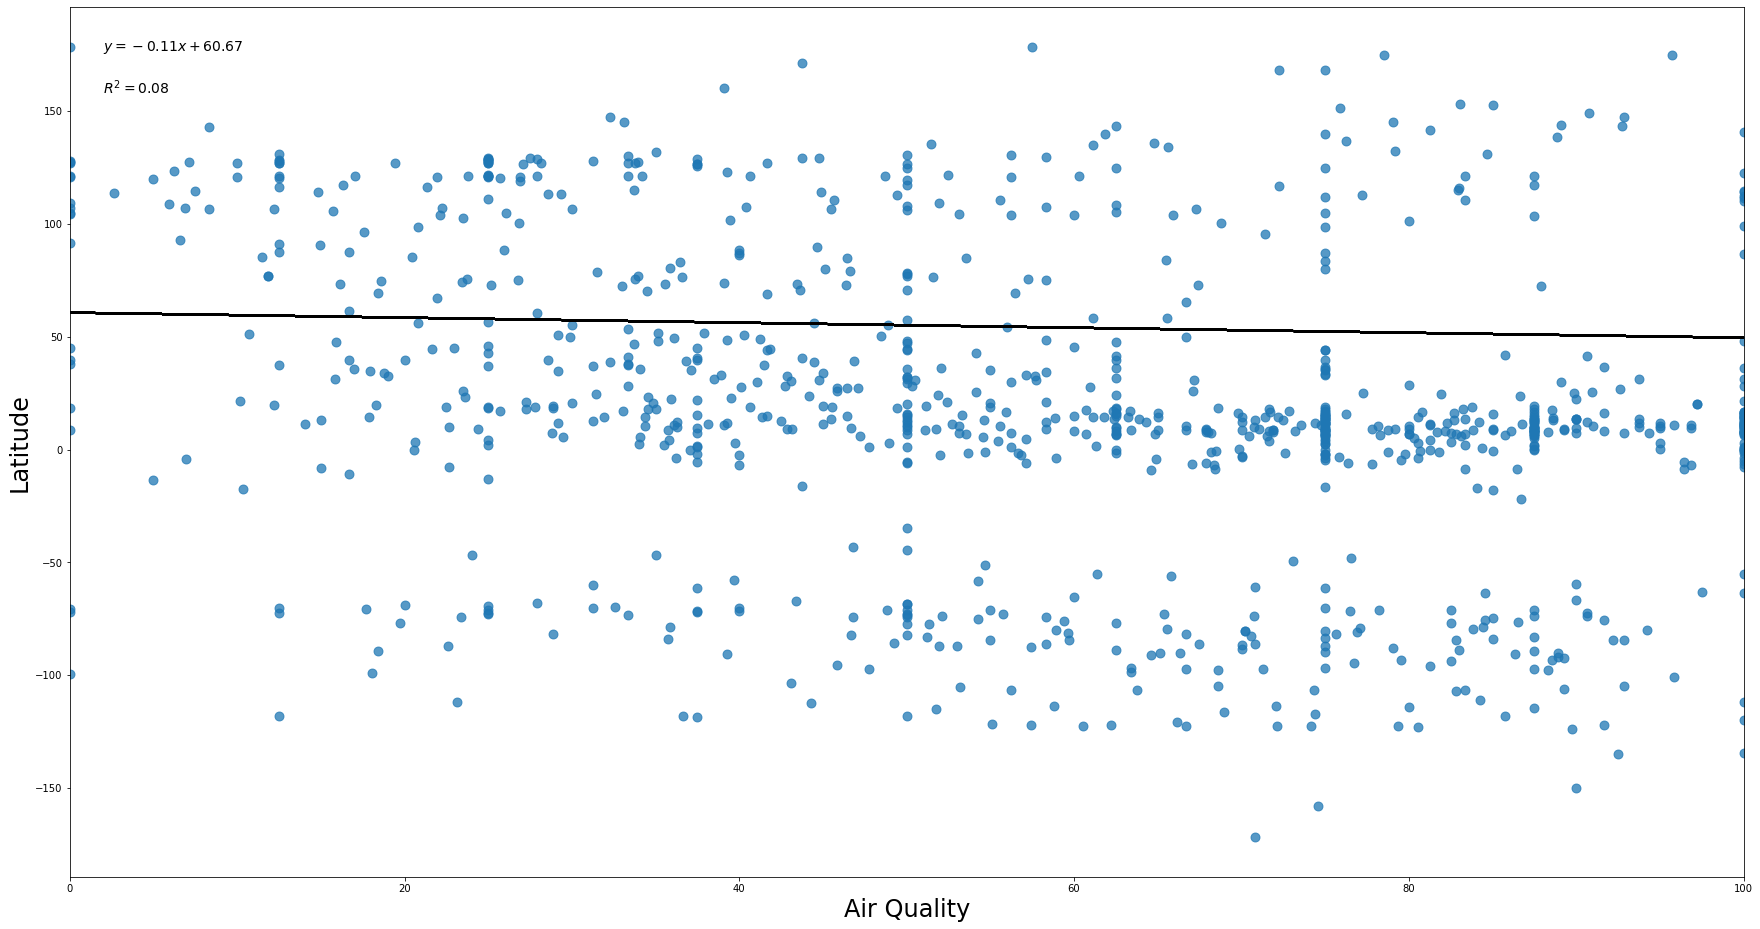

           City  Longitude    Latitude            Region      Country  \
0  Invercargill -46.417871  168.361466  Southland Region  New Zealand   

                                      Address  AirQuality  WaterPollution  
0  Invercargill Southland Region New Zealand    72.222222            30.0  


In [60]:
airquality = poll["AirQuality"]
latitude = poll["Latitude"]
longitude = poll["Longitude"]

#filter for just one location:
inverc = poll[poll['City'] == "Invercargill"]
air = inverc["AirQuality"]
water = inverc["WaterPollution"]

plt.figure(figsize=(30,16))

#plt.plot(latitude, airquality)
plt.scatter(airquality, latitude, s=80, alpha=0.75)

plt.xlim([0, 100])

plt.xlabel("Air Quality", fontsize=24)
plt.ylabel("Latitude", fontsize=24)

# Use numpy to do a simple linear fit to time series data 
model = np.polyfit(latitude, airquality, 1)
predicted = np.polyval(model, latitude)

plt.plot(latitude, predicted, linewidth=2, color='black')

slope = model[0]
intercept = model[1]
plt.annotate('$y=%3.5sx+%3.5s$'%(slope, intercept), xy=(0.02, 0.95), xycoords='axes fraction', fontsize=14)

r2 = np.corrcoef(airquality, latitude)[0, 1]**2
plt.annotate('$R^2=%3.4s$'%(r2), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=14)

plt.show()

print(inverc)

Text(0.5, 1.0, 'World Air Quality')

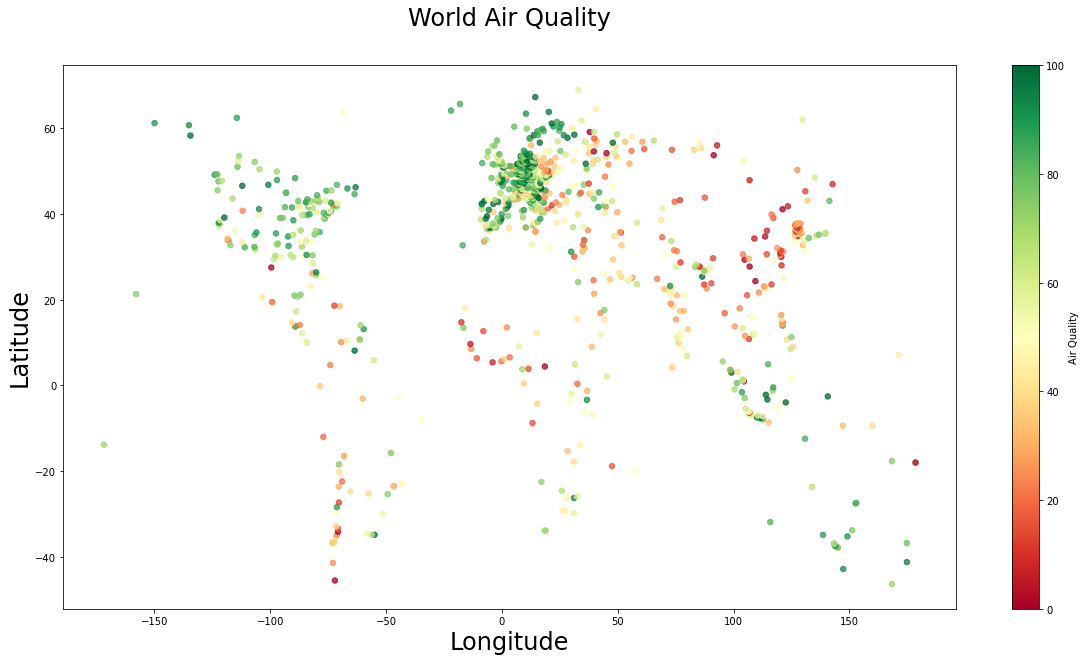

In [61]:
import matplotlib
from matplotlib import cm

plt.figure(figsize=(20, 10))

my_cmap = cm.RdYlGn

norm = matplotlib.colors.Normalize(vmin=0, vmax=100)
r = cm.ScalarMappable(cmap=my_cmap, norm=norm)
r.set_array([])
plt.colorbar(r, label='Air Quality')

plt.scatter(latitude, longitude, c=airquality, cmap=my_cmap, s=30, alpha=0.75)

plt.xlabel("Longitude", fontsize=24)
plt.ylabel("Latitude", fontsize=24)
plt.title("World Air Quality", pad=40, fontsize=24)